# PCA and K-Nearest Neighbor Algorithm

In this section we apply One hot encoding, PCA and K-Nearest Neighbor to determine the profile that relates to yours the most. We use first encode our data set numerically by using One Hot Encoding. Next we apply PCA to reduce the dimensionality of our data, finally we test our data against KNN and check the accuracy score of the nearest profile to you. The aim is to get close to 80% and better.

## Libraries

Here's a brief description of the purpose for each library.

- matplotlib, we use matplotlib as visualization tool.
- pandas, for data analysis.
- preprocessing & StandardScaler, mainly used for one encoding our data set.

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

### Preprocessing the data set

In this section we encode our data set using the sklearn library and we run One hot encode to our features to represent a count of words. One hot encode is used in most machine learning application as a way to translate string values into a binary representation. 

In [11]:
# Prepocessing the data set (One hot coder with sklearn)
label = preprocessing.LabelEncoder()
enc = preprocessing.OneHotEncoder()

### Importing our LinkedIn Profile data set

In this section we use pandas to load our data set that we've gathered in our data collection.

In [12]:
# load data set
linkedIn_data = pd.read_csv('../excel-data/2_update-linkedin.csv')
linkedIn_data

,Headline,Industry
0,"Director of Data Science, Machine Learning at ...",Machine Learning
1,Leverage System-On-Chip Software and Deep Lear...,Machine Learning
2,Machine Learning Research Scientist - Deep Lea...,Machine Learning
3,Principal Data Scientist at Accenture,Machine Learning
4,Vice President of Machine Learning at Walmart ...,Machine Learning
...,...,...
100,SENIOR DIRECTOR OF SALES AND NEW BUSINESS DEVE...,Sales
101,Director of Sales and New Verticals,Sales
102,"Director, Enterprise Systems Integration at We...",Sales
103,Senior Account Executive at Drop Technologies,Sales


### One hot encoding

We then perform one-hot-encoding to translate our data sets into binary representations. Performing this action will turn our values from up above into an Array.

In [13]:
# One hot code our data set
x = linkedIn_data.apply(label.fit_transform)
enc.fit(x)
onehotlabels = enc.transform(x).toarray()
onehotlabels.shape

(105, 112)

# PCA - Principle Component Analysis

Principle component analysis will reduces the dimensionality of the machine learning program to classify our data. As stated in our previous analysis on PCA we'll be using the data sets from our linkedin scraper to reduce the n dimensions. In the function below we use our binary representations (in an array form) from up above and apply it to the data and column names.

In [14]:
# create a dataframe using the data and columns names
df = pd.DataFrame(x)

In [17]:
df.head()

,Headline,Industry
0,24,3
1,60,3
2,62,3
3,74,3
4,100,3


## Standardize the data

It is difficult to visualize our high dimensional data so we use PCA to find the first two principle components, and visualize the data in a new two-dimensonal space. Before using PCA we'll need to scale our data so that our feature has a single unit of variance. Below we use the StandardScaler Library we imported up above.

In [22]:
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

## Transform Data with PCA

We instantiate a PCA object, find the principle components using the fit method and adjust the n_components to 2. We also Transform this data into its first 2 principle components

In [23]:
from sklearn.decomposition import PCA

In [24]:
# increase pca and compare & contrast
pca = PCA(n_components=2)

In [25]:
pca.fit(scaled_data)

PCA(n_components=2)

In [26]:
x_pca = pca.fit_transform(scaled_data)

### Reducing the data set
By using PCA we've reduced our data dimensionality by from 112 to 2.

In [29]:
# Shape the data
scaled_data.shape

(105, 2)

In [30]:
x_pca.shape

(105, 2)

### Plotting the Dimensions
We reference the Industry column in our excel sheet and visualize the linearity, which simplifies the problem by:

1. retricting the set of potential basis
2. Formulating the implied contuinty in our dataset
**(Shlens, 2003)**


Text(0, 0.5, 'Second principle component')

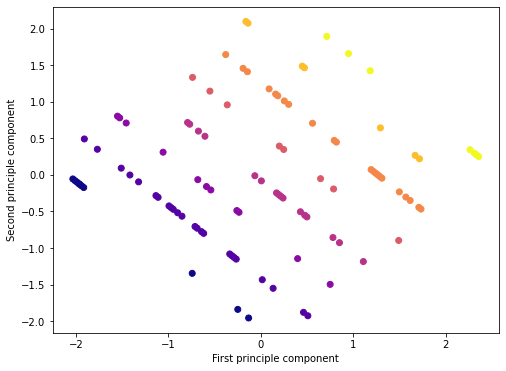

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1], c=x['Industry'], cmap='plasma')

plt.xlabel('First principle component')
plt.ylabel('Second principle component')

### Labeling and plotting our PCA components

Previously we had many other columns that had little to no corrolation with each other. Due to the inconclusivity we've reduced the amount of columns and only used the **Headline** and **Industry**. The plot above tells us that our data set appears to be strongly related, which indicates that the following plots in our data sets are nearby from each other. The following code below categorize the data continuity set by Industry labels.

- Showcase the before and after code here

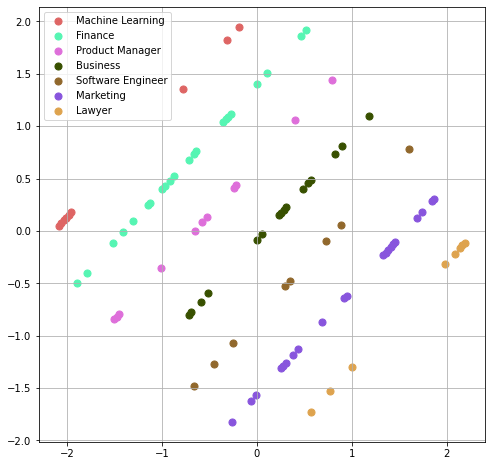

In [28]:
principleDf = pd.DataFrame(data=x_pca, columns=['PC-1','PC-2'])
finalDf = pd.concat([principleDf, df['Industry']], axis=1)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

# Labeling the dimensions
targets = ["Machine Learning", "Finance", "Product Manager", "Business", "Software Engineer", "Marketing", "Lawyer"]
colors = ["#de6564", "#56f5b3", "#de6fda", "#385000", "#91682c", "#8855dd", "#dea34e"]

for i, target in (enumerate(targets)):
    indKeep = finalDf['Industry'] == i
    ax.scatter(finalDf.loc[indKeep, 'PC-1'], finalDf.loc[indKeep, 'PC-2'], c=colors[i], s=50)

    
# phrase 2vector
ax.legend(targets)
ax.grid()
plt.show()

Here's an array of our principle components in binary form.

In [33]:
pca.components_

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

## Split the data

Before applying K-NN to our data set we'll need to split the data into seperate variables we cut one and two sigma, which is a principle way to decide how many dimensions to include and retains a fix percentage of the variant.

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = x_pca
y = x['Industry']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Apply the PCA to KNN

After we've successfully initialize our trained tests we can now apply KNN to PCA. The code below imports the KNeighborsClassifier from sklearn and fits the training data into the knn variable. We then import the confusion_matrix and use it on our test data, the purpose of the confusion matrix is to summarize our performance for our classification algorithm. Thus giving us a better idea the type of error were making.

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
knn = KNeighborsClassifier(n_neighbors=1)

In [64]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [65]:
pred = knn.predict(X_test)

In [66]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [67]:
pred_vis = confusion_matrix(y_test,pred)
print(pred_vis)

[[4 1 0 0 0 0 0]
 [0 6 0 0 0 0 0]
 [0 1 2 1 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 8 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 0 0 0 3]]


### Accuracy Score
There are two parts to our results, we first run the accuracy score to make sure the set of labels does in fact predict the similar results as y_test. We then run a classfication_report to determine the classification metrics of our algorithm.

The result of our algorithm shows that the f1-score is 84% accurate in predicting the relationship between the two points.

In [71]:
# printing the accuracy score
print(accuracy_score(y_test, pred))

0.84375


In [72]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.75      1.00      0.86         6
           2       1.00      0.50      0.67         4
           3       0.75      1.00      0.86         3
           5       0.80      1.00      0.89         8
           6       1.00      0.33      0.50         3
           7       1.00      1.00      1.00         3

    accuracy                           0.84        32
   macro avg       0.90      0.80      0.81        32
weighted avg       0.88      0.84      0.83        32

